In [ ]:
!pip install diffusers --upgrade
!pip install invisible_watermark transformers accelerate safetensors
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 113.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 36.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
 

In [ ]:
import torch
import os
import time
from IPython.core.display import display, HTML

from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from diffusers import StableDiffusionPipeline

import os
import torch
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import time


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
stable_diffusion_pipeline = StableDiffusionPipeline.from_pretrained('runwayml/stable-diffusion-v1-5',
                                                                    torch_dtype=torch.float16)
stable_diffusion_pipeline = stable_diffusion_pipeline.to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
def text_to_image(pipeline, prompt):

    # Start the timer
    start_time = time.time()

    # Call the pipeline function directly
    result = pipeline([prompt], generator=torch.Generator("cuda").manual_seed(42))

    # Calculate and print the elapsed time
    elapsed_time = time.time() - start_time
    display(HTML(f'<span style="color: #3264ff; font-weight:bold;font-size: 20px;">Time taken to generate: {elapsed_time:.2f} seconds</span>'))

    img = result.images[0]

    filename = prompt.replace(' ', '_')
    if len(filename) > 100:  # Limit filename to 100 characters
        filename = filename[:100]

    # Incorporate the pipeline's class name into the filename
    pipeline_name = pipeline.__class__.__name__
    #save_path = os.path.join("/content", f"{pipeline_name}_{filename}.png")
    save_path = os.path.join("D:/deciDiffusion", f"{pipeline_name}_{filename}.png")
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    img.save(save_path)

    # Display the saved image
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return save_path

  0%|          | 0/50 [00:00<?, ?it/s]

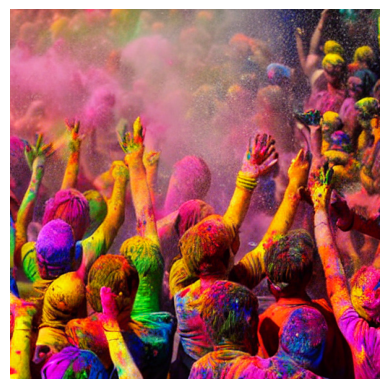

'D:/deciDiffusion/StableDiffusionPipeline_Create_a_colorful_image_capturing_the_spirit_of_the_Holi_festival,_with_people_throwing_vibrant_powd.png'

In [ ]:
text_to_image(stable_diffusion_pipeline, "Create a colorful image capturing the spirit of the Holi festival, with people throwing vibrant powdered colors.")


  0%|          | 0/50 [00:00<?, ?it/s]

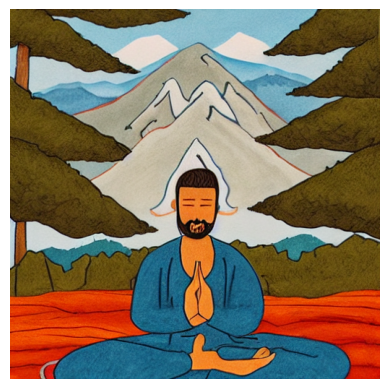

'D:/deciDiffusion/StableDiffusionPipeline_Illustrate_a_meditative_scene_of_a_yogi_practicing_yoga_amidst_the_serene_beauty_of_the_Himalayan_mo.png'

In [ ]:
text_to_image(stable_diffusion_pipeline, "Illustrate a meditative scene of a yogi practicing yoga amidst the serene beauty of the Himalayan mountains.")

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['. ensure balanced integration .']


  0%|          | 0/50 [00:00<?, ?it/s]

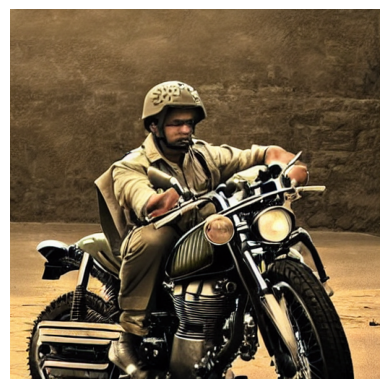

'D:/deciDiffusion/StableDiffusionPipeline_Design_a_700x1600px_Android_wallpaper_with_four_elements:\n\nIndian_Armed_Forces_Officer:_Strong,_dedi.png'

In [ ]:
text_to_image(stable_diffusion_pipeline, '''Design a 700x1600px Android wallpaper with four elements:

Indian Armed Forces Officer: Strong, dedicated, patriotic in uniform.
Tech Expert: Surrounded by digital screens and coding symbols.
G-SHOCK GWG-2000-1A1 Watch: Symbolizing toughness and precision.
Jawa 42 Bobber Motorcycle: Representing freedom and adventure.
Ensure balanced integration.''')
